In [24]:
## Import libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
# import keras
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout,UpSampling2D,AveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import os
import pathlib
from tensorflow.keras.applications import ResNet50




from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img

import argparse


In [3]:
print("Tensorflow version: ", tf.__version__)

Tensorflow version:  2.3.1


In [4]:
# change to CPU
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [5]:
folder="D:\working folder\data Sciense\DataSet\Kaggle\Concrete Crack Images for Classification-Kaggle\capstone"
output="Dataset"
train="train"
test="test"
result="result_res"
val="validation"
path_out=os.path.join(folder, output) 
path_train = os.path.join(path_out, train) 
path_val=os.path.join(path_out, val) 
path_test=os.path.join(path_out, test) 
path_result=os.path.join(path_out, result) 

#os.makedirs(path_train,exist_ok=True)
#os.makedirs(path_test,exist_ok=True)




In [6]:

batch_size=32
input_shape=(128,128,3)
train_dataset=[]
generator=ImageDataGenerator( rescale = 1.0/255)

#folder="D:\working folder\data Sciense\DataSet\Kaggle\Concrete Crack Images for Classification-Kaggle\Concrete"
train_dataset=generator.flow_from_directory(path_train,batch_size=batch_size,
                                       class_mode='binary',
                                       target_size=(128,128),
                                       shuffle=True,seed=42)
                                          #,color_mode='grayscale')        
                                      
val_dataset=generator.flow_from_directory(path_val,batch_size=batch_size,
                                        class_mode='binary',
                                        target_size=(128,128), 
                                        shuffle=True,seed=42,)
                                        #color_mode='graysc10ale')
test_dataset=generator.flow_from_directory(path_test,batch_size=batch_size,
                                        class_mode='binary',
                                        target_size=(128,128),
                                        shuffle=False,seed=42,)
                                        #color_mode='grayscale')

#color_mode='grayscale')

Found 3400 images belonging to 2 classes.
Found 480 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


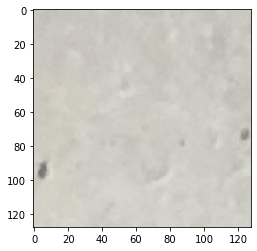

In [14]:
sample = train_dataset.next();
#print(sample)
plt.imshow(sample[0][0])
train_dataset.reset()


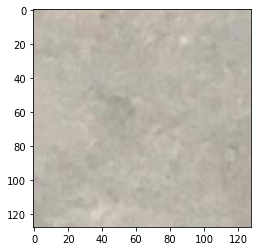

In [15]:
sample2 = val_dataset.next();
#print(sample)
plt.imshow(sample2[0][0])
val_dataset.reset()


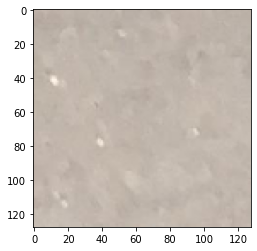

In [16]:
test_dataset.reset()
sample3 = test_dataset.next();
#print(sample)
plt.imshow(sample3[0][31])



In [86]:
model = Sequential()

model.add(ResNet50(include_top = False, pooling = 'ave', weights = 'imagenet',classes=2,input_shape=(128, 128, 3)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

model.layers[0].trainable = False

print(model.summary())



Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 4, 4, 2048)        23587712  
_________________________________________________________________
flatten_3 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_30 (Dense)             (None, 128)               4194432   
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 129       
Total params: 27,782,273
Trainable params: 4,194,561
Non-trainable params: 23,587,712
_________________________________________________________________
None


In [87]:
METRICS = [
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'),
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
]

custom_early_stopping = EarlyStopping(
    monitor='val_accuracy', 
    patience=5, 
    min_delta=0.001, 
    mode='auto'
)
custom_checkpointer = ModelCheckpoint(filepath = "D:\working folder\data Sciense\DataSet\Kaggle\Concrete Crack Images for Classification-Kaggle\capstone\best.hdf5", monitor = 'val_accuracy', save_best_only = True, mode = 'auto')

In [88]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=METRICS)

In [89]:
history=model.fit_generator(train_dataset,steps_per_epoch=3400//batch_size,epochs=25,validation_data=val_dataset,validation_steps=480//batch_size)

Epoch 1/25
106/106 [==============================] - 76s 719ms/step - loss: 0.5346 - tp: 1245.0000 - fp: 383.0000 - tn: 1303.0000 - fn: 437.0000 - accuracy: 0.7565 - precision: 0.7647 - recall: 0.7402 - auc: 0.8286 - val_loss: 0.3199 - val_tp: 207.0000 - val_fp: 0.0000e+00 - val_tn: 240.0000 - val_fn: 33.0000 - val_accuracy: 0.9312 - val_precision: 1.0000 - val_recall: 0.8625 - val_auc: 0.9962
Epoch 2/25
106/106 [==============================] - 76s 720ms/step - loss: 0.2659 - tp: 1497.0000 - fp: 86.0000 - tn: 1597.0000 - fn: 188.0000 - accuracy: 0.9186 - precision: 0.9457 - recall: 0.8884 - auc: 0.9695 - val_loss: 0.1528 - val_tp: 227.0000 - val_fp: 1.0000 - val_tn: 239.0000 - val_fn: 13.0000 - val_accuracy: 0.9708 - val_precision: 0.9956 - val_recall: 0.9458 - val_auc: 0.9964
Epoch 3/25
106/106 [==============================] - 80s 755ms/step - loss: 0.1692 - tp: 1554.0000 - fp: 43.0000 - tn: 1643.0000 - fn: 128.0000 - accuracy: 0.9492 - precision: 0.9731 - recall: 0.9239 - auc: 0

Epoch 22/25
106/106 [==============================] - 73s 692ms/step - loss: 0.0981 - tp: 1608.0000 - fp: 27.0000 - tn: 1658.0000 - fn: 75.0000 - accuracy: 0.9697 - precision: 0.9835 - recall: 0.9554 - auc: 0.9929 - val_loss: 0.0682 - val_tp: 233.0000 - val_fp: 7.0000 - val_tn: 233.0000 - val_fn: 7.0000 - val_accuracy: 0.9708 - val_precision: 0.9708 - val_recall: 0.9708 - val_auc: 0.9983
Epoch 23/25
106/106 [==============================] - 73s 690ms/step - loss: 0.0919 - tp: 1616.0000 - fp: 21.0000 - tn: 1665.0000 - fn: 66.0000 - accuracy: 0.9742 - precision: 0.9872 - recall: 0.9608 - auc: 0.9936 - val_loss: 0.0675 - val_tp: 231.0000 - val_fp: 4.0000 - val_tn: 236.0000 - val_fn: 9.0000 - val_accuracy: 0.9729 - val_precision: 0.9830 - val_recall: 0.9625 - val_auc: 0.9982
Epoch 24/25
106/106 [==============================] - 74s 696ms/step - loss: 0.0957 - tp: 1612.0000 - fp: 18.0000 - tn: 1669.0000 - fn: 69.0000 - accuracy: 0.9742 - precision: 0.9890 - recall: 0.9590 - auc: 0.9928 -

In [98]:
history.history['accuracy']

[0.7565320730209351,
 0.9186460971832275,
 0.949228048324585,
 0.9560570120811462,
 0.9649174809455872,
 0.9631829261779785,
 0.9566508531570435,
 0.9590261578559875,
 0.963776707649231,
 0.9706056714057922,
 0.9720902442932129,
 0.9691211581230164,
 0.9694180488586426,
 0.966152012348175,
 0.9676365852355957,
 0.9723871946334839,
 0.9714964628219604,
 0.9732779264450073,
 0.9720902442932129,
 0.9670427441596985,
 0.964073657989502,
 0.9697149395942688,
 0.9741686582565308,
 0.9741686582565308,
 0.9735748171806335]

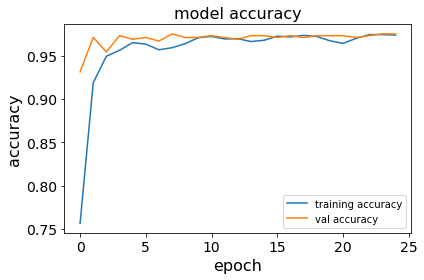

<Figure size 432x288 with 0 Axes>

In [91]:
fig, ax = plt.subplots()

ax.plot(history.history['accuracy'],label='training accuracy')
ax.plot(history.history['val_accuracy'],label='val accuracy')

ax.set_title('model accuracy',{'size':16})
ax.set_xlabel('epoch',{'size':16})
ax.set_ylabel('accuracy',{'size':16})
              
plt.tick_params(labelsize=14)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
plt.savefig('test.png', bbox_inches='tight')

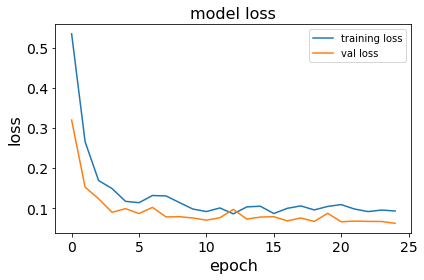

In [99]:
fig, ax = plt.subplots()

ax.plot(history.history['loss'],label='training loss')
ax.plot(history.history['val_loss'],label='val loss')

ax.set_title('model loss',{'size':16})
ax.set_xlabel('epoch',{'size':16})
ax.set_ylabel('loss',{'size':16})
              
plt.tick_params(labelsize=14)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()